# Machine Learning Pipeline - Model Training

In this notebook, we pick up the `xtrain.csv` and `xtest.csv` that we saved in the previous notebooks.

# Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we **set the seed**.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# for the yeo-johnson transformation
import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
#pd.pandas.set_option('display.max_rows', None)

In [2]:
# load the train and test set with the engineered variables that 

X_train = pd.read_csv('../Data/xtrain.csv')
X_test = pd.read_csv('../Data/xtest.csv')

X_train.head()

,Location,Type,Bedrooms,Bathrooms,log_SqYds,Yrs_SinceBlt,Parking_Spaces,Floors,Elevators,Lobby,Double_Glazed_Windows,Central_AC,Central_Heating,Waste_Disposal,Furnished,Service_Elevators,Flooring,Electricity_Backup,Servant_Quarters,Study_Room,Prayer_Room,Powder_Room,Gym,Lounge_or_Sitting_Room,Laundry_Room,Business_Center_or_Media_Room,Satellite_or_Cable_TV_Ready,Internet,Intercom,Conference_Room,Community_Swimming_Pool,Community_Lawn_or_Garden,Community_Gym,Community_Center,First_Aid_or_Medical_Centre,Day_Care_center,Kids_Play_Area,Mosque,Barbeque_Area,Lawn_or_Garden,Swimming_Pool,Sauna,Jacuzzi,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled,Bedrooms_na,Bathrooms_na,SqYds_na,Floors_na,Elevators_na,Year_na
0,0.363636,0.0,0.2,0.333333,0.362916,0.125000,0.010,0.191489,0.045455,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.454545,1.0,0.5,0.555556,0.360900,0.583333,0.002,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.181818,0.0,0.2,0.222222,0.290589,0.208333,0.000,0.212766,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.181818,1.0,0.4,0.444444,0.326943,0.208333,0.000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.181818,0.0,0.1,0.111111,0.088235,0.208333,0.000,0.212766,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [3]:
# load the target (remember that the target is log transformed)
y_train = pd.read_csv('../Data/ytrain.csv')
y_test = pd.read_csv('../Data/ytest.csv')

y_train.head()

,Price
0,3.610918
1,4.248495
2,2.484907
3,3.860730
4,0.530628


In [4]:
y_test.head()

,Price
0,2.772589
1,2.014903
2,2.833213
3,1.945910
4,2.694627


In [5]:
# load the pre-selected features
# ==============================

# we selected the features in the previous notebook (step 2)

features = pd.read_csv('../Data/selected_features.csv')
features = features['0'].to_list() 

# display final feature set
features

['Location',
 'Type',
 'Bedrooms',
 'Bathrooms',
 'log_SqYds',
 'Yrs_SinceBlt',
 'Floors',
 'Lobby',
 'Double_Glazed_Windows',
 'Central_Heating',
 'Service_Elevators',
 'Flooring',
 'Electricity_Backup',
 'Servant_Quarters',
 'Prayer_Room',
 'Powder_Room',
 'Gym',
 'Lounge_or_Sitting_Room',
 'Business_Center_or_Media_Room',
 'Internet',
 'Intercom',
 'Conference_Room',
 'Community_Gym',
 'First_Aid_or_Medical_Centre',
 'Kids_Play_Area',
 'Mosque',
 'Nearby_Shopping_Malls',
 'Nearby_Restaurants',
 'Other_Nearby_Places',
 'Security_Staff',
 'Bedrooms_na',
 'Bathrooms_na',
 'SqYds_na',
 'Floors_na',
 'Elevators_na',
 'Year_na']

In [6]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

### Regularised linear regression: Lasso

Remember to set the seed.

In [7]:
# set up the model
# remember to set the random_state / seed

lin_model = Lasso(alpha = 0.001, random_state = 0)

# train the model

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [8]:
# evaluate the model:
# ====================

# remember that we log transformed the output (Price) in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso we need to transform both the target and the predictions back to the original house prices values.

# We will evaluate performance using the mean squared error and the root of the mean squared error and r2

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred)))))

print('train rmse: {}'.format(int(mean_squared_error(np.exp(y_train), np.exp(pred), squared = False))))

print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred)))))

print('test rmse: {}'.format(int(mean_squared_error(np.exp(y_test), np.exp(pred), squared = False))))

print('test r2: {}'.format(r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 1144
train rmse: 33
train r2: 0.6595986373636977

test mse: 982
test rmse: 31
test r2: 0.7024645733037156

Average house price:  27


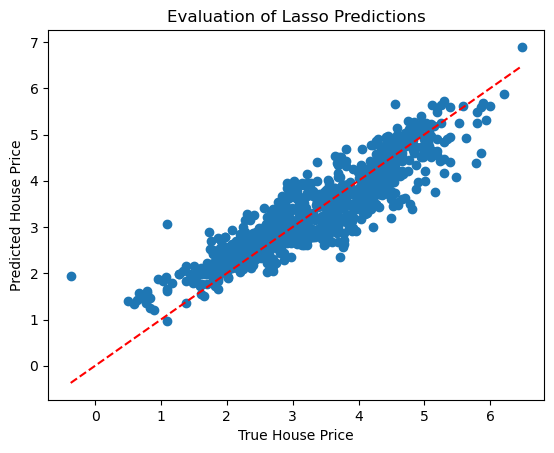

In [9]:
# let's evaluate our predictions respect to the real price
plt.scatter(y_test, lin_model.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')
plt.show()

We can see that our model is doing a pretty good job at estimating house prices.

In [10]:
y_test.reset_index(drop = True)

,Price
0,2.772589
1,2.014903
2,2.833213
3,1.945910
4,2.694627
...,...
977,4.430817
978,1.945910
979,1.945910
980,2.251292


In [11]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop = True, inplace = True)

preds = pd.Series(lin_model.predict(X_test))

preds

0      3.109397
1      2.359892
2      3.675602
3      2.129032
4      3.392593
         ...   
977    4.676423
978    2.051788
979    2.340871
980    2.298919
981    3.325886
Length: 982, dtype: float64

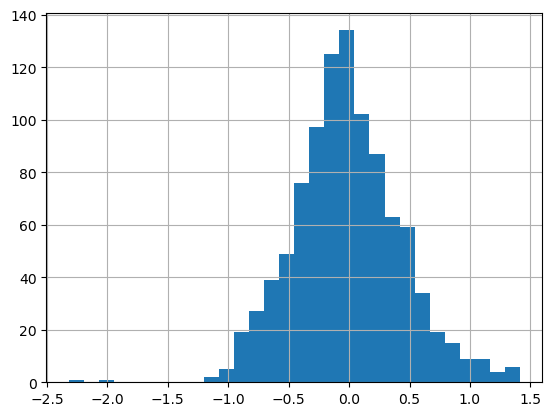

In [12]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test['Price'] - preds
errors.hist(bins = 30)
plt.show()

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

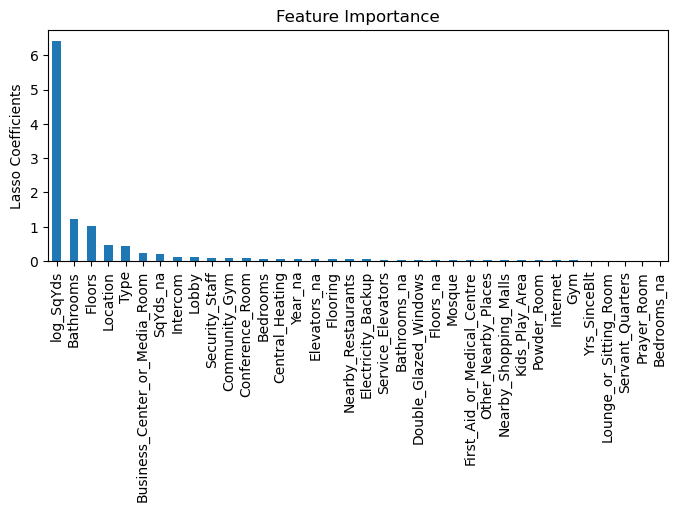

In [13]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace = True, ascending = False)
importance.plot.bar(figsize = (8, 3))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')
plt.show()

In [14]:
test = np.exp(y_test)
#test

In [15]:
predictions = pd.DataFrame(np.exp(preds), columns = ['Predictions'])
#predictions.head()

In [16]:
errors = predictions['Predictions'] - test['Price']

In [17]:
errors = pd.DataFrame(errors, columns = ['Errors'])

In [18]:
df_pred = pd.concat([test, predictions, errors], axis = 1)
df_pred

,Price,Predictions,Errors
0,16.000000,22.407523,6.407523
1,7.500000,10.589806,3.089806
2,16.999999,39.472427,22.472428
3,7.000000,8.406723,1.406722
4,14.800002,29.742989,14.942987
...,...,...,...
977,83.999992,107.385313,23.385321
978,7.000000,7.781803,0.781802
979,7.000000,10.390278,3.390278
980,9.500000,9.963407,0.463407


In [19]:
df_pred.loc[(df_pred['Errors'] > 0) & (df_pred['Errors'] < 1)]

,Price,Predictions,Errors
10,16.000000,16.020280,0.020280
18,23.500002,23.649389,0.149387
26,25.999999,26.427251,0.427252
46,8.499999,9.203136,0.703137
63,7.500000,8.467357,0.967357
76,12.399999,12.866439,0.466440
102,16.000000,16.425690,0.425690
147,5.500001,5.896737,0.396737
151,18.000001,18.809378,0.809378
170,6.560000,7.542960,0.982960


In [20]:
df_pred.to_csv('../Data/predictions.csv')

## Save the Model

In [21]:
# we are happy to our model, so we save it to be able
# to score new data

joblib.dump(lin_model, '../Models/lasso_reg.joblib') 

['../Models/lasso_reg.joblib']